In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../src")
import model.util as model_util
import model.cnn as cnn
import plot.plot_motifs as plot_motifs
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import tqdm.notebook

In [2]:
# Plotting defaults
plot_params = {
    "figure.titlesize": 22,
    "axes.titlesize": 22,
    "axes.labelsize": 20,
    "legend.fontsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "font.family": "Roboto",
    "font.weight": "bold",
    "svg.fonttype": "none"
}
plt.rcParams.update(plot_params)

In [3]:
base_path = "/projects/site/gred/resbioai/tsenga5/mechint_regnet/"

In [4]:
model_paths = {
    "SPI1": os.path.join(base_path, "models/trained_models/simulated/spi1_exp_single/standard_cnn_with_filterreg/2/last_ckpt.pth"),
    "TAL/GATA": os.path.join(base_path, "models/trained_models/simulated/tal_gata_exp_mix/standard_cnn_with_filterreg/1/last_ckpt.pth"),
    "E2F6": os.path.join(base_path, "models/trained_models/simulated/e2f6_max_exp_coop/standard_cnn_with_filterreg/2/last_ckpt.pth"),
    "REST": os.path.join(base_path, "models/trained_models/simulated/rest_exp_both/standard_cnn_with_filterreg/1/last_ckpt.pth"),
    "CTCF": os.path.join(base_path, "models/trained_models/experimental/chipseq_ctcf_hepg2/standard_cnn_with_filterreg/3/last_ckpt.pth"),
    "FOXA1": os.path.join(base_path, "models/trained_models/experimental/chipseq_foxa1_hepg2/standard_cnn_with_filterreg/1/last_ckpt.pth")
}

### Import filter weights

In [5]:
# Import filter weights
filter_weights = {}
for key, model_path in model_paths.items():
    model = model_util.load_model(
        cnn.ConvNet, model_path
    )
    filter_weights[key] = np.transpose(model.conv_layers[0][0].weight.detach().numpy(), axes=(0, 2, 1))

### Plot motifs

SPI1


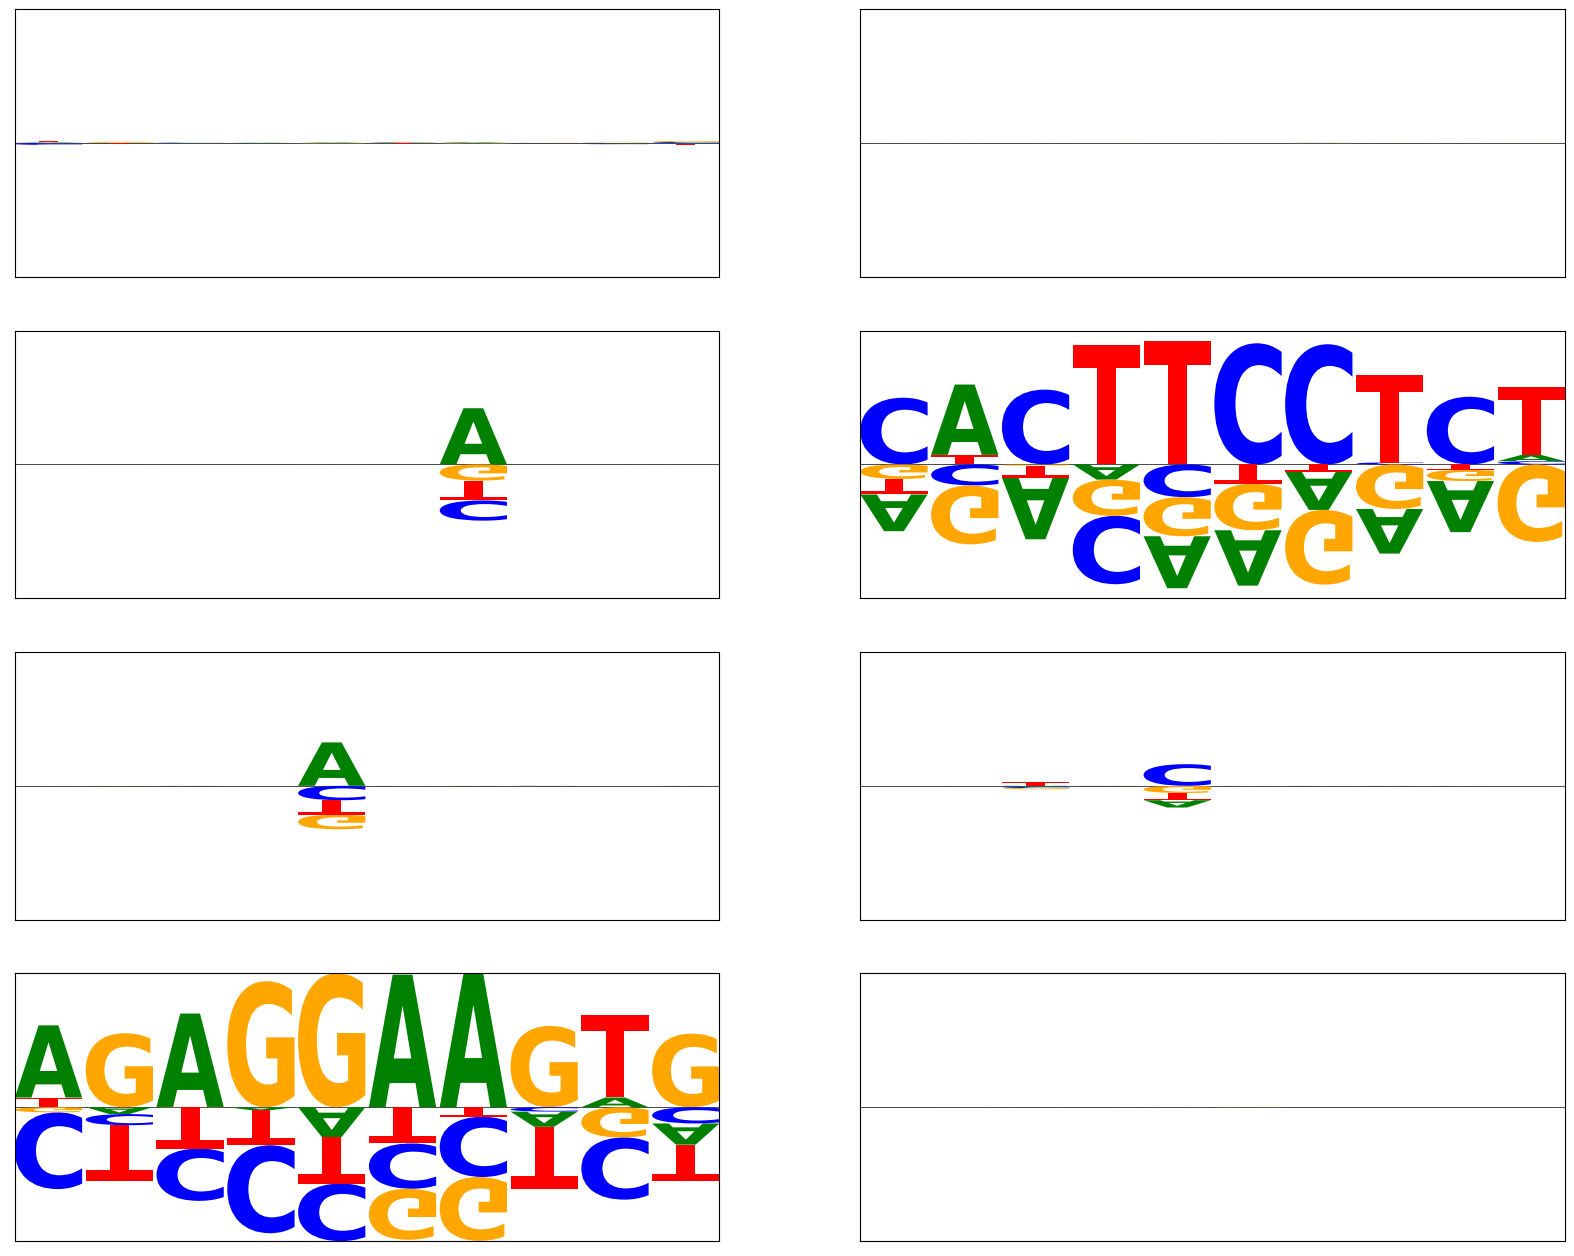

TAL/GATA


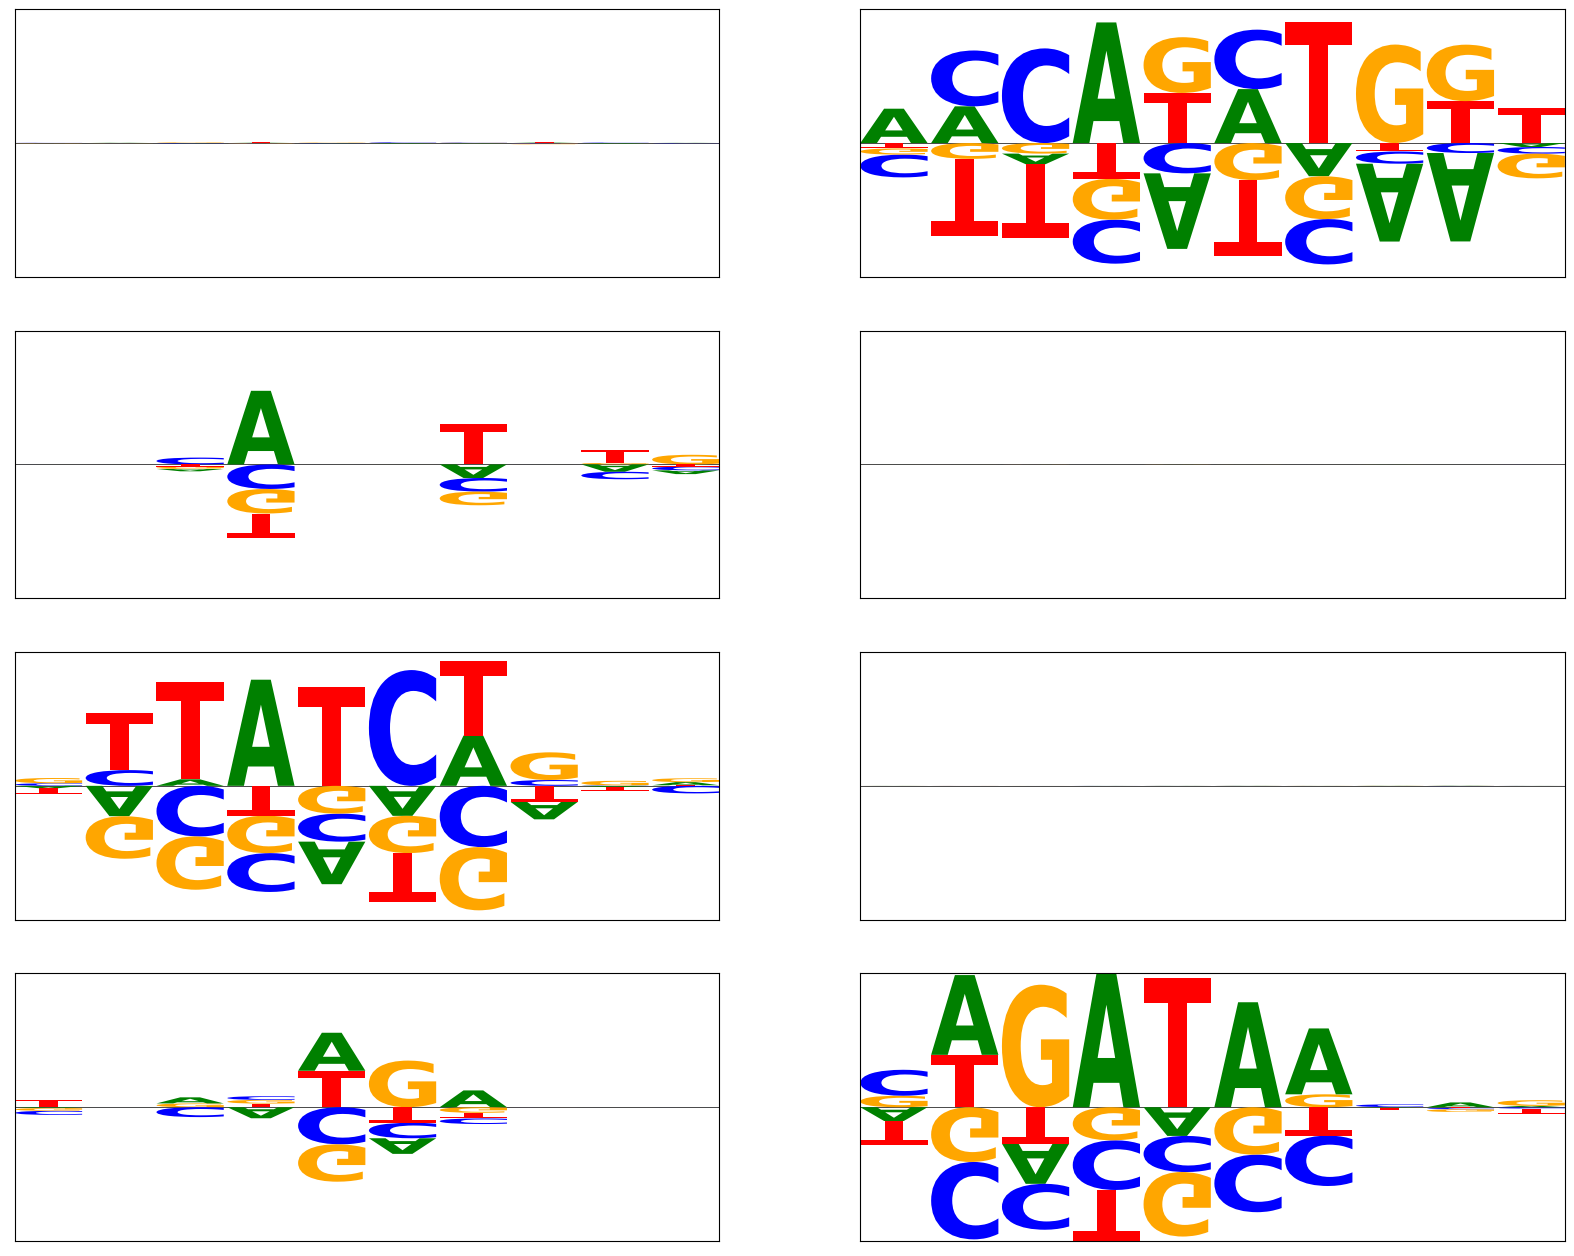

E2F6


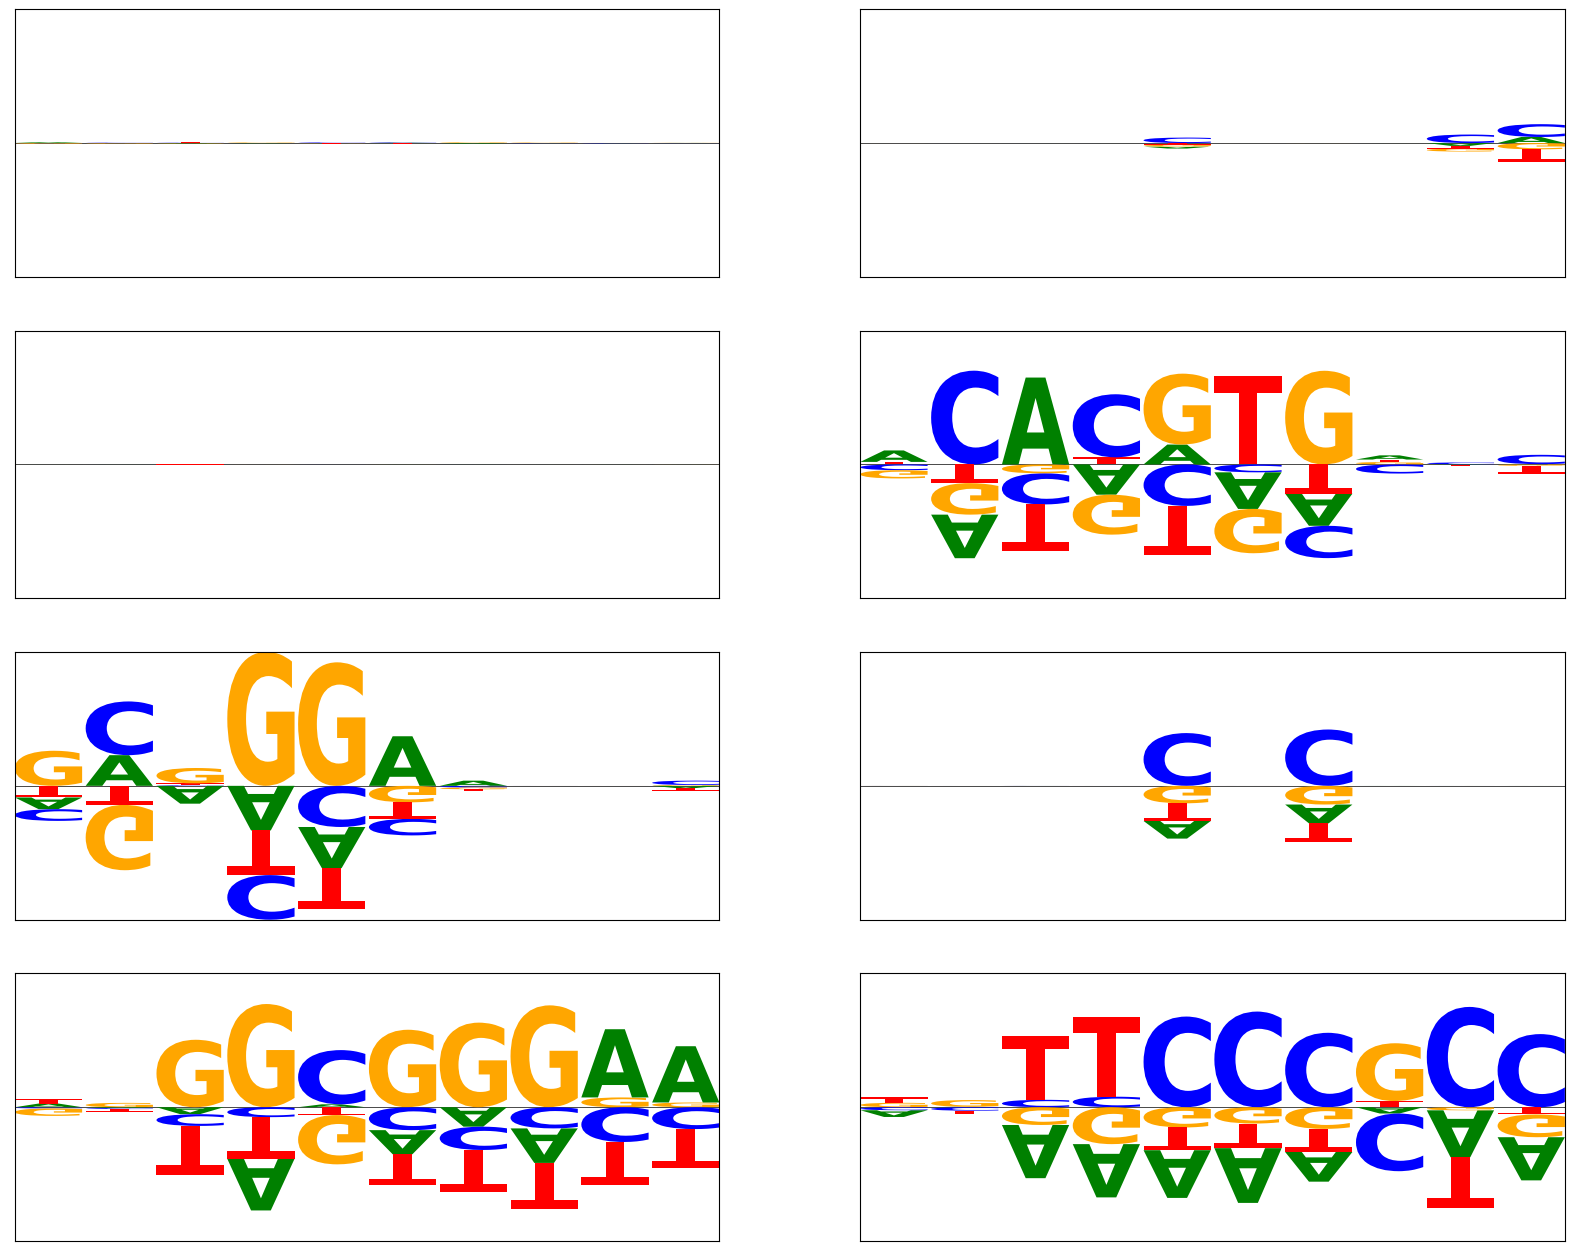

REST


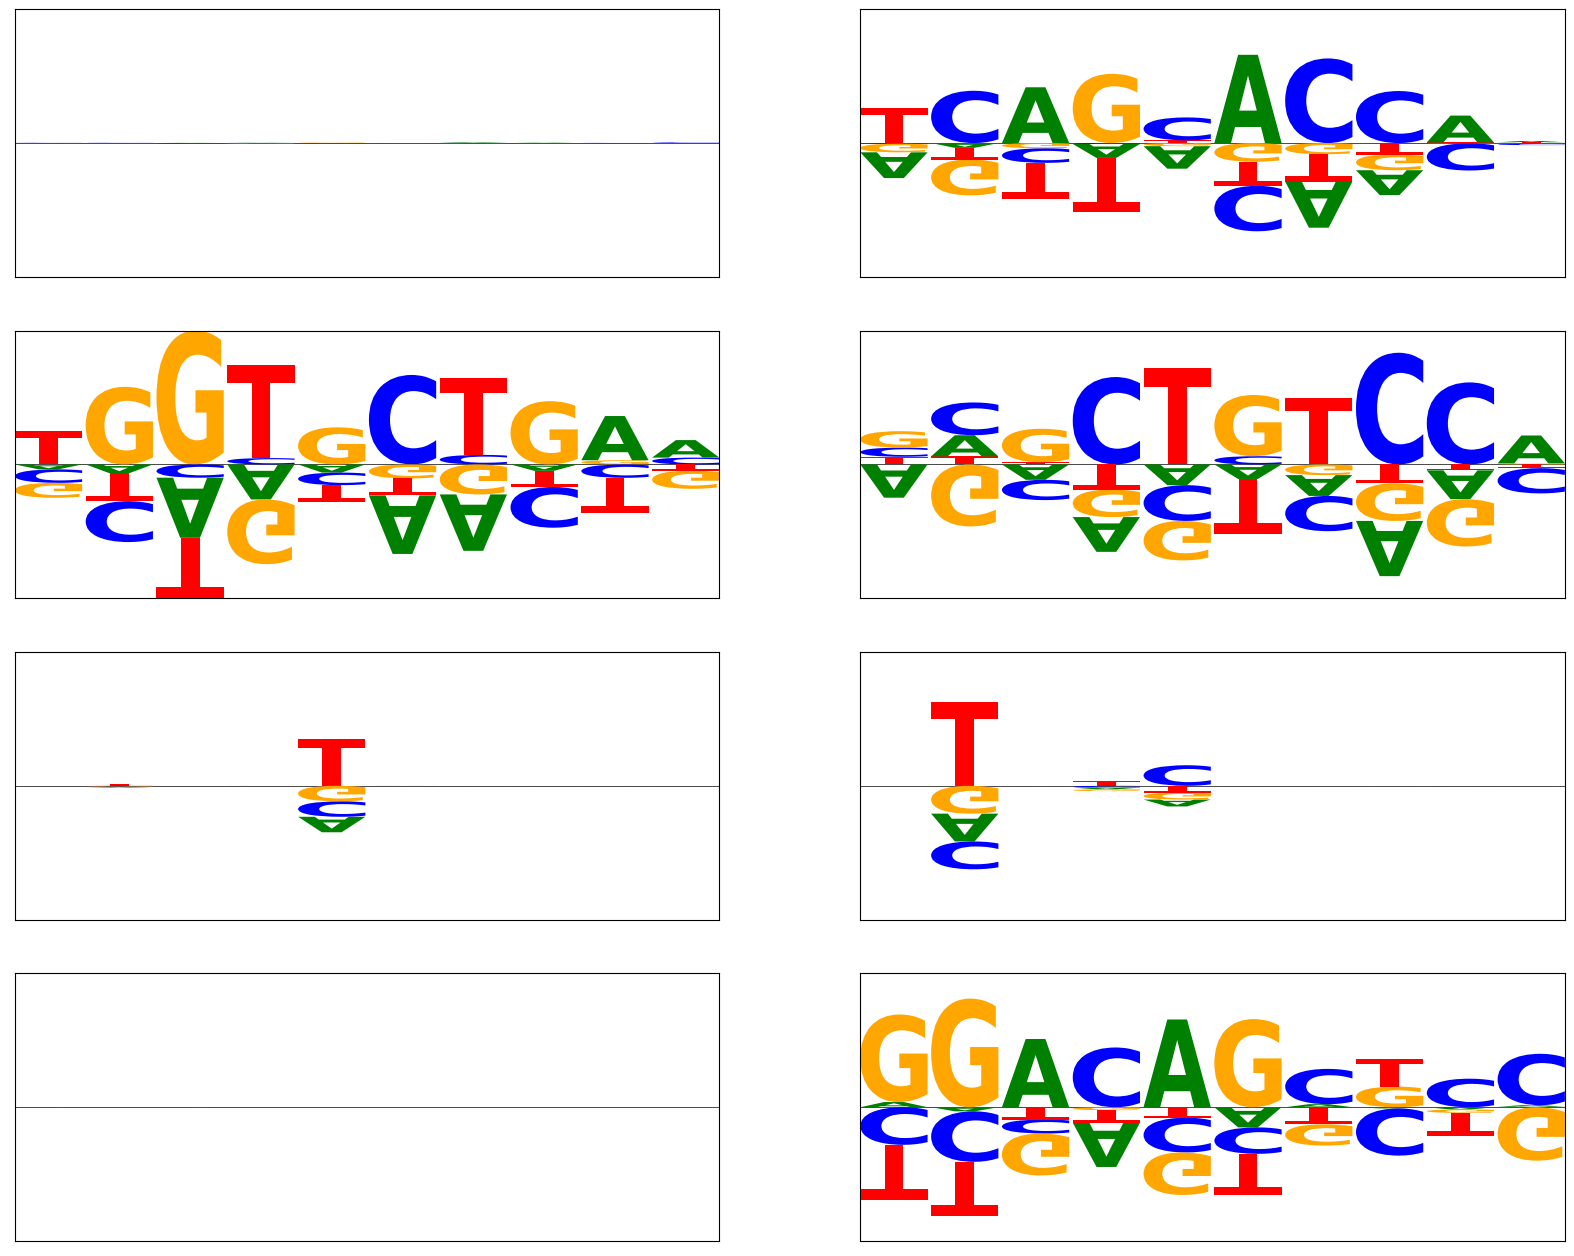

CTCF


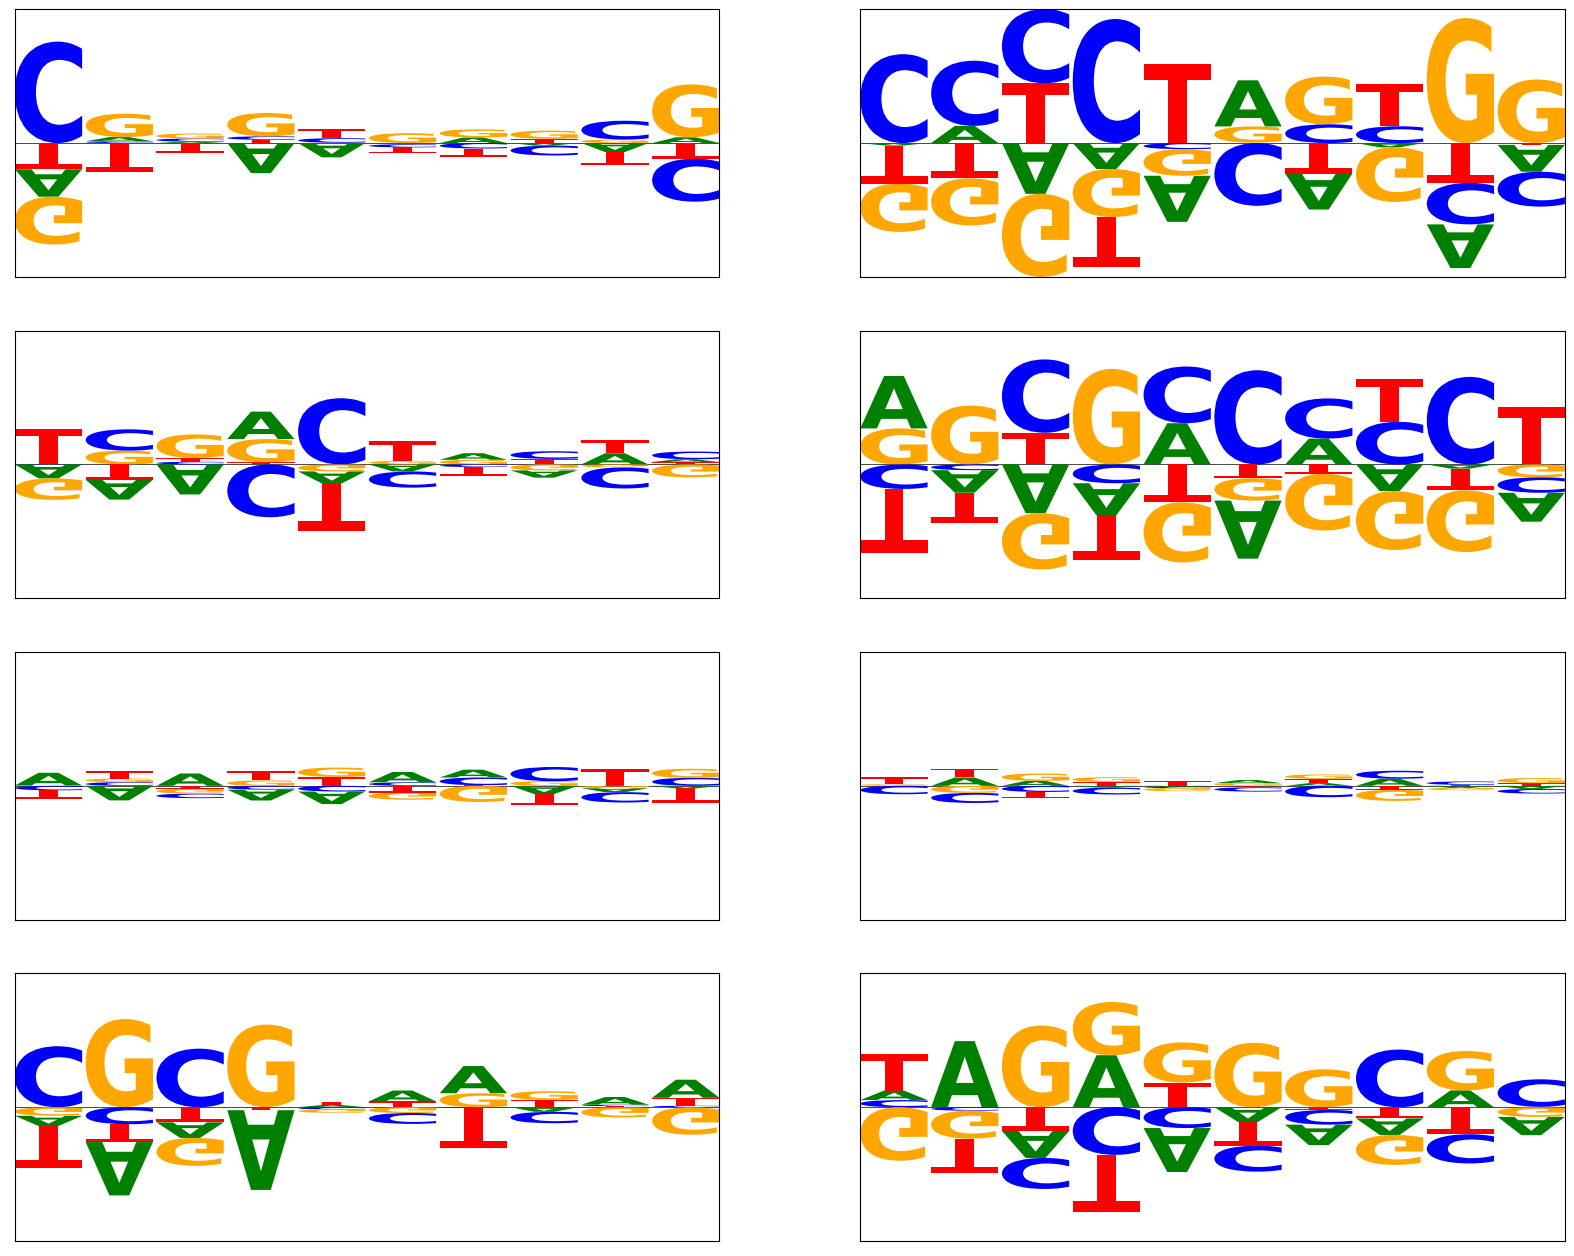

FOXA1


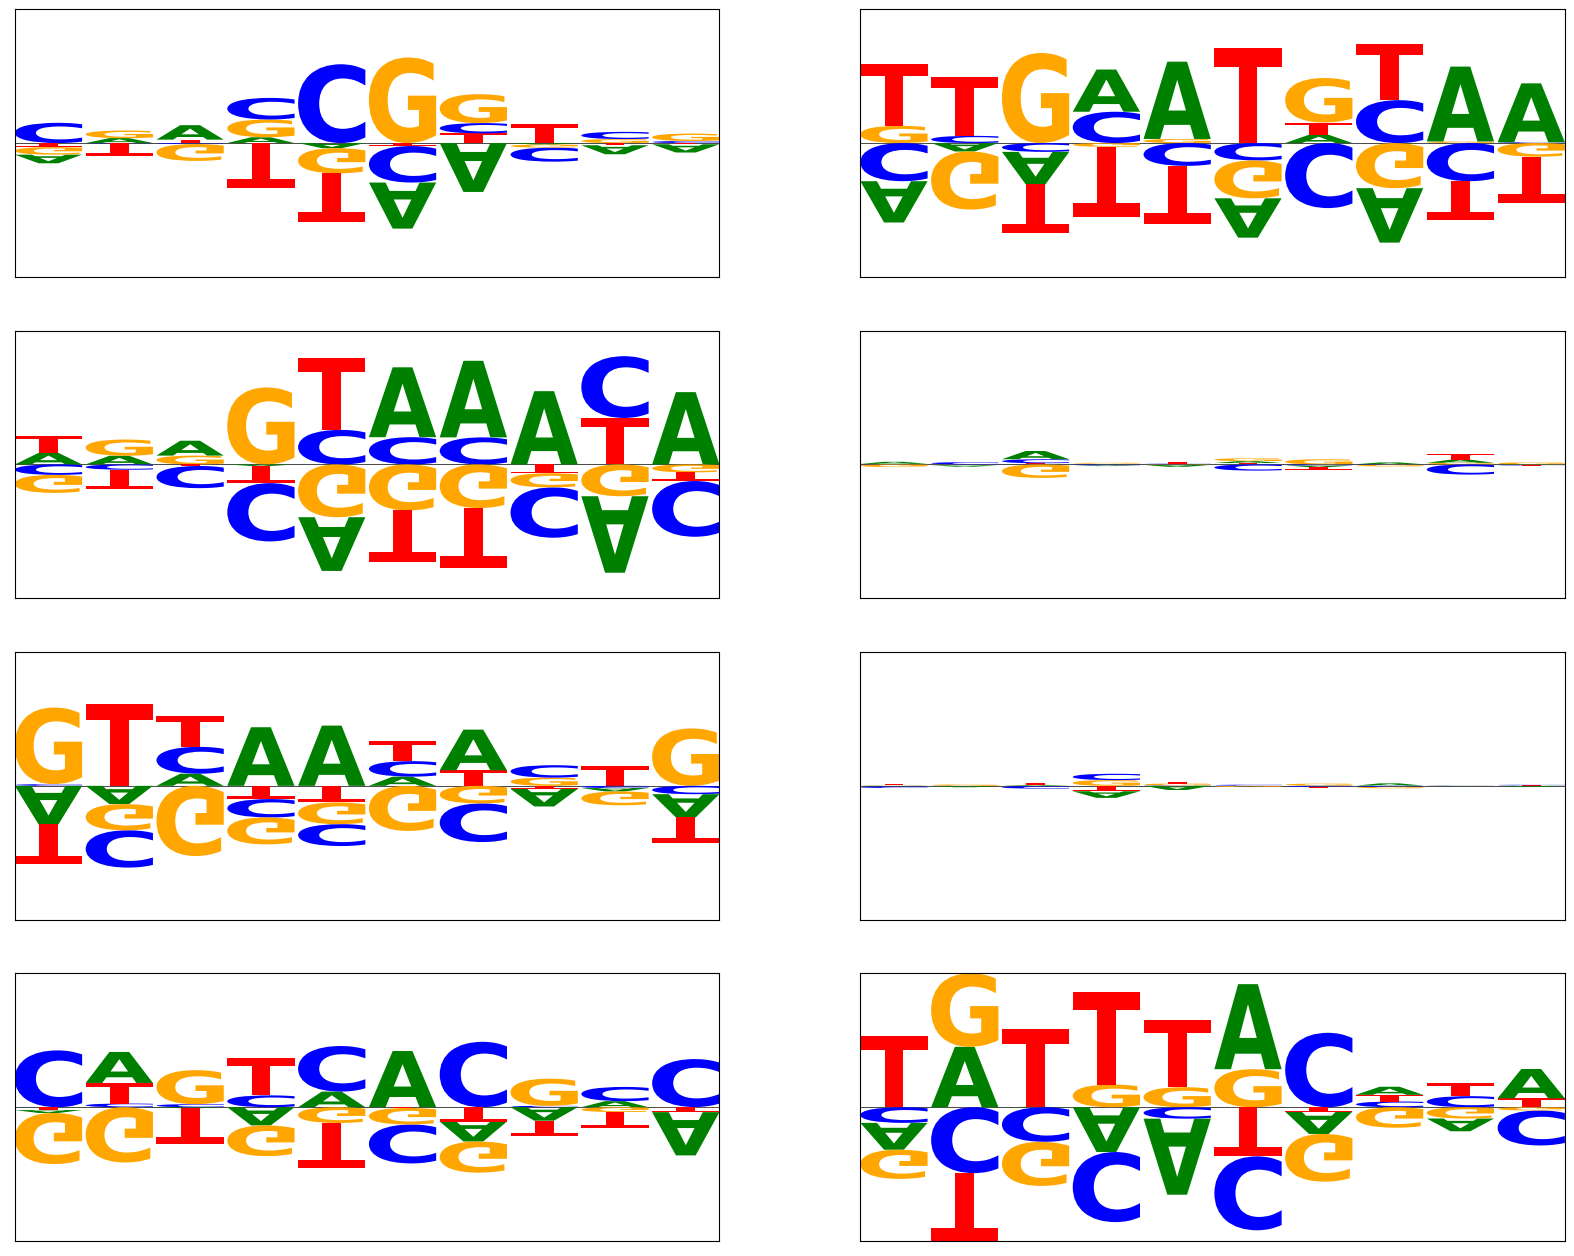

In [6]:
for key in filter_weights:
    print(key)
    plot_motifs.plot_motif_grid(
        filter_weights[key] - np.mean(filter_weights[key], axis=2, keepdims=True),
        show_x=False, show_y=False
    )